In [10]:
%cd /content/Moonshot_Interview/
!git clone https://gitclone.com/github.com/kanishkg/stream-of-search.git
%cd /content/Moonshot_Interview/stream-of-search

/content/Moonshot_Interview
fatal: destination path 'stream-of-search' already exists and is not an empty directory.
/content/Moonshot_Interview/stream-of-search


In [3]:
!pip install -q --upgrade pip
%cd /content/Moonshot_Interview/stream-of-search
!pip install -r requirements.txt
!pip install transformers datasets accelerate bitsandbytes
!pip uninstall -y torch torchvision torchaudio accelerate
!pip install torch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 --extra-index-url https://download.pytorch.org/whl/cu117
%cd /content/Moonshot_Interview
!git clone --depth 1 https://github.com/hiyouga/LLaMA-Factory.git
%cd LLaMA-Factory
!pip install -e ".[torch,metrics]"
!llamafactory-cli version


/content/Moonshot_Interview/stream-of-search
ERROR: Could not find a version that satisfies the requirement torch==2.0.1+cu117 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==2.0.1+cu117
Found existing installation: torch 2.0.0+cu117
Uninstalling torch-2.0.0+cu117:
  Successfully uninstalled torch-2.0.0+cu117
Found existing installation: torchvision 0.15.0+cu117
Uninstalling torchvision-0.15.0+cu117:
  Successfully uninstalled torchvision-0.15.0+cu117
Found existing installation: torchaudio 2.0.0+cu117
Uninstalling torchaudio-2.0.0+cu117:
  Successfully uninstalled torchaudio-2.0.0+cu117
Found existing installation: accelerate 0.27.2
Uninstalling accelerate-0.27.2:
  Successfully uninstalled accelerate-0.27.2
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
  Using cached https://download.pytorch.org/whl/cu117/torch-2.0.0%

In [11]:
%cd /content/Moonshot_Interview/stream-of-search
# 进入 src 目录
import os

# 改变当前工作目录
os.chdir('src')  # 确保该目录下有 countdown_generate.py 文件
!ls
# 导入必要的库
import subprocess

# 设置参数并调用 countdown_generate.py
subprocess.run(['python', 'countdown_generate.py', '--seed', '4', '--data_dir', 'data/b4_3_random/', '--min_range', '4', '--start_range', '4', '--num_samples', '10000'])

countdown_bfs.py       countdown_get_difficult.py  countdown_star_filter.py  eval_neo.py
countdown_dfs.py       countdown_optimal.py	   countdown_utils.py	     __pycache__
countdown_generate.py  countdown.py		   data			     train.py


CompletedProcess(args=['python', 'countdown_generate.py', '--seed', '4', '--data_dir', 'data/b4_3_random/', '--min_range', '4', '--start_range', '4', '--num_samples', '10000'], returncode=0)

In [12]:
import json

# 定义读取 JSON 文件的函数
def load_json(filename):
    with open(filename, "r", encoding="utf-8") as f:
        data = json.load(f)  # 使用 json.load 以一次性读取整个 JSON 文件
    return data

# 指定你的 JSON 文件名
filename = '/content/Moonshot_Interview/stream-of-search/src/data/b4_3_random/train1_b4_t100_n10000_random.json'  # 这里替换为你的文件路径

# 读取 JSON 文件
data = load_json(filename)

# 打印总记录数量
print(f"Total records: {len(data)}")

# 打印前五条记录
for i in range(min(5, len(data))):
    print(f"Record {i + 1}: {data[i]}")

Total records: 10000
Record 1: {'nums': [95, 87, 42, 3], 'target': 24, 'solution': ['95-42=53', '87/3=29', '53-29=24'], 'search_path': "Current State: 24:[95, 87, 42, 3], Operations: []\nExploring Operation: 87-42=45, Resulting Numbers: [95, 3, 45]\nGenerated Node #0,0: 24:[95, 3, 45] Operation: 87-42=45\nExploring Operation: 95-42=53, Resulting Numbers: [87, 3, 53]\nGenerated Node #0,1: 24:[87, 3, 53] Operation: 95-42=53\nExploring Operation: 95-87=8, Resulting Numbers: [42, 3, 8]\nGenerated Node #0,2: 24:[42, 3, 8] Operation: 95-87=8\nMoving to Node #0,2\nCurrent State: 24:[42, 3, 8], Operations: ['95-87=8']\nExploring Operation: 42-8=34, Resulting Numbers: [3, 34]\nGenerated Node #0,2,0: 24:[3, 34] Operation: 42-8=34\nExploring Operation: 42/3=14, Resulting Numbers: [8, 14]\nGenerated Node #0,2,1: 24:[8, 14] Operation: 42/3=14\nExploring Operation: 42-3=39, Resulting Numbers: [8, 39]\nGenerated Node #0,2,2: 24:[8, 39] Operation: 42-3=39\nMoving to Node #0,0\nCurrent State: 24:[95, 3

Total records after deduplication: 10901
Total records after filtering (rating != 0.0): 5576
Total filtered records: 5576
Length of first five records: [4799, 2623, 12747, 1269, 1599]
Total Training records: 5476
Total Testing records: 100
Mean Length of Training records: 4247.2521913805695
Mean Length of Testing records: 4326.8


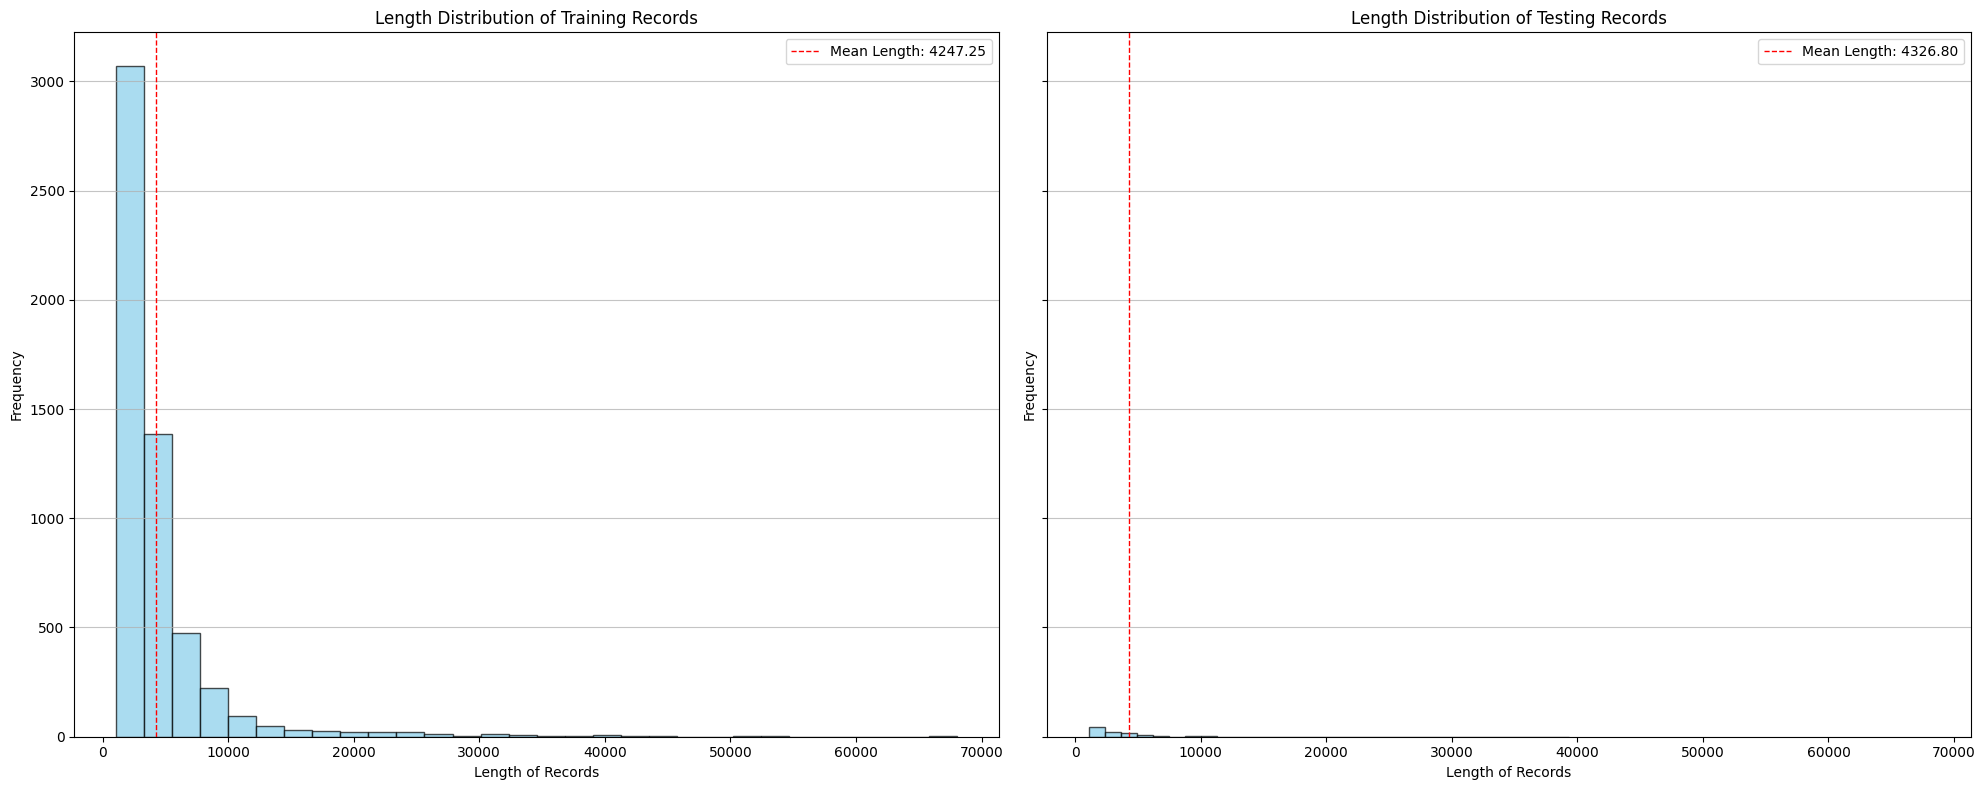

Training data saved to /content/Moonshot_Interview/train_set.json
Testing data saved to /content/Moonshot_Interview/test_set.json


In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random

# 定义读取 JSON 文件的函数
def load_json(filename):
    with open(filename, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

# 指定文件名
train_filename = '/content/Moonshot_Interview/stream-of-search/src/data/b4_3_random/train1_b4_t100_n10000_random.json'
val_filename = '/content/Moonshot_Interview/stream-of-search/src/data/b4_3_random/val1_b4_t100_n10000_random.json'

# 加载 JSON 文件
train_data = load_json(train_filename)
val_data = load_json(val_filename)

# 合并数据
combined_data = train_data + val_data

# 去除重复记录，基于 'nums' 字段
unique_records = {}
for record in combined_data:
    nums_tuple = tuple(sorted(record['nums']))  # 将 nums 转换为元组并排序以确保一致性
    unique_records[nums_tuple] = record  # 使用无序列化的 nums 作为键保持唯一性

# 获取去重后的记录列表
deduped_data = list(unique_records.values())

# **过滤 rating 不为 0.0 的记录**
filtered_data = [record for record in deduped_data if record.get('rating', 0.0) != 0.0]

# 输出去重和过滤后的记录数量
print(f"Total records after deduplication: {len(deduped_data)}")
print(f"Total records after filtering (rating != 0.0): {len(filtered_data)}")

# 计算每条记录的长度
lengths = [len(str(record)) for record in filtered_data]

# 打印总记录数量和前五条记录长度
print(f"Total filtered records: {len(filtered_data)}")
print("Length of first five records:", [len(str(record)) for record in filtered_data[:5]])

# 随机抽取 100 个样本作为测试集
test_size = 100

# 如果过滤后记录数不足 100，考虑处理的方式 (报错或调整)
if len(filtered_data) < test_size:
    raise ValueError("Not enough records with rating != 0.0 to sample from for the test set.")

test_set = random.sample(filtered_data, test_size)

# 训练集是剩下的记录
train_set = [record for record in filtered_data if record not in test_set]

# 输出训练集和测试集的记录数量
print(f"Total Training records: {len(train_set)}")
print(f"Total Testing records: {len(test_set)}")
print(f"Mean Length of Training records: {np.mean([len(str(record)) for record in train_set])}")
print(f"Mean Length of Testing records: {np.mean([len(str(record)) for record in test_set])}")

# 定义绘制长度分布图的函数，并添加均值线
def plot_length_distribution(record_set, name, ax):
    lengths = [len(str(record)) for record in record_set]
    mean_length = np.mean(lengths)

    # 绘制长度分布直方图
    ax.hist(lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Length Distribution of {name} Records')
    ax.set_xlabel('Length of Records')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

    # 添加均值线
    ax.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean Length: {mean_length:.2f}')
    ax.legend()

# 创建一个图形并绘制两个子图，确保横坐标对齐
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

# 绘制训练集长度分布
plot_length_distribution(train_set, "Training", axs[0])

# 绘制测试集长度分布
plot_length_distribution(test_set, "Testing", axs[1])

# 自动调整布局
plt.tight_layout()
plt.show()

# 保存训练集和测试集到文件
train_output_filename = '/content/Moonshot_Interview/train_set.json'
test_output_filename = '/content/Moonshot_Interview/test_set.json'

with open(train_output_filename, "w", encoding="utf-8") as f:
    json.dump(train_set, f, ensure_ascii=False, indent=4)

with open(test_output_filename, "w", encoding="utf-8") as f:
    json.dump(test_set, f, ensure_ascii=False, indent=4)

print(f"Training data saved to {train_output_filename}")
print(f"Testing data saved to {test_output_filename}")

In [14]:
import json
import os

def convert_24game_to_sharegpt_format(record):
    """
    将单条 24 点原始数据转换成 ShareGPT 对话格式。

    record 形如：
    {
        'nums': [95, 87, 42, 3],
        'target': 24,
        'solution': [...],
        'search_path': "...",
        ...
    }
    返回值是一个 JSON 结构，如：
    {
        "messages": [
            {"role": "system", "content": "..."},
            {"role": "user", "content": "..."},
            {"role": "assistant", "content": "..."}
        ]
    }
    """
    nums_str = ", ".join(str(x) for x in record["nums"])
    target = record.get("target", 24)

    # 1) system 消息：给出模型身份或背景。
    system_message = {
        "role": "system",
        "content": "You are a helpful assistant with the ability to solve 24-point puzzles. Show your reasoning step by step."
    }

    # 2) user 消息：提出问题（包含 nums, target 等）。
    user_prompt = f"Find a sequence of +,-,/,* which can be applied to the numbers {nums_str} to get to {target}, where each of the given numbers is used exactly once."
    user_message = {
        "role": "user",
        "content": user_prompt
    }

    # 3) assistant 消息：这里把原始数据中的搜索过程 (search_path) + 解题思路 (solution) 合并为一个回答
    #    你也可以自己选择展示多少“思考过程”。
    search_path = record.get("search_path", "")
    solution_steps = record.get("solution", [])
    optimal_path = record.get('optimal_path',"")


    assistant_content = (
        f"Search Path:\n{search_path}\n\n"
    )
    assistant_message = {
        "role": "assistant",
        "content": assistant_content
    }

    # 合并成 sharegpt 格式
    sharegpt_entry = {
        "messages": [
            system_message,
            user_message,
            assistant_message
        ]
    }

    return sharegpt_entry


def main():
    input_path = "/content/Moonshot_Interview/train_set.json"
    output_path = "/content/Moonshot_Interview/train_set_sharegpt.jsonl"

    # 1) 读取原始数据
    with open(input_path, "r", encoding="utf-8") as f:
        data = json.load(f)  # 这里假设你的原始 JSON 是一个列表，每个元素是一个 record

    # 准备输出文件
    with open(output_path, "w", encoding="utf-8") as fout:
        for record in data:
            sharegpt_item = convert_24game_to_sharegpt_format(record)
            # 按行写入 JSONL
            json_line = json.dumps(sharegpt_item, ensure_ascii=False)
            fout.write(json_line + "\n")

    print(f"转换完成！新的 JSONL 文件保存在: {output_path}")

    input_path = "/content/Moonshot_Interview/test_set.json"
    output_path = "/content/Moonshot_Interview/test_set_sharegpt.jsonl"

    # 1) 读取原始数据
    with open(input_path, "r", encoding="utf-8") as f:
        data = json.load(f)  # 这里假设你的原始 JSON 是一个列表，每个元素是一个 record

    # 准备输出文件
    with open(output_path, "w", encoding="utf-8") as fout:
        for record in data:
            sharegpt_item = convert_24game_to_sharegpt_format(record)
            # 按行写入 JSONL
            json_line = json.dumps(sharegpt_item, ensure_ascii=False)
            fout.write(json_line + "\n")

    print(f"转换完成！新的 JSONL 文件保存在: {output_path}")


if __name__ == "__main__":
    main()

转换完成！新的 JSONL 文件保存在: /content/Moonshot_Interview/train_set_sharegpt.jsonl
转换完成！新的 JSONL 文件保存在: /content/Moonshot_Interview/test_set_sharegpt.jsonl


In [15]:
import json

def print_first_record(jsonl_path):
    """
    读取指定的JSONL文件，并打印第一条记录。

    参数:
        jsonl_path (str): JSONL文件的路径。
    """
    try:
        with open(jsonl_path, 'r', encoding='utf-8') as file:
            first_line = file.readline()
            if not first_line:
                print("文件为空。")
                return
            record = json.loads(first_line)
            print("第一条记录内容如下：\n")
            print(json.dumps(record, ensure_ascii=False, indent=4))
    except FileNotFoundError:
        print(f"文件未找到: {jsonl_path}")
    except json.JSONDecodeError as e:
        print(f"JSON解码错误: {e}")

if __name__ == "__main__":
    # 定义你的JSONL文件路径
    jsonl_file_path = "/content/Moonshot_Interview/train_set_sharegpt.jsonl"

    # 调用函数打印第一条记录
    print_first_record(jsonl_file_path)

第一条记录内容如下：

{
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful assistant with the ability to solve 24-point puzzles. Show your reasoning step by step."
        },
        {
            "role": "user",
            "content": "Find a sequence of +,-,/,* which can be applied to the numbers 95, 87, 42, 3 to get to 24, where each of the given numbers is used exactly once."
        },
        {
            "role": "assistant",
            "content": "Search Path:\nCurrent State: 24:[95, 87, 42, 3], Operations: []\nExploring Operation: 87-42=45, Resulting Numbers: [95, 3, 45]\nGenerated Node #0,0: 24:[95, 3, 45] Operation: 87-42=45\nExploring Operation: 95-42=53, Resulting Numbers: [87, 3, 53]\nGenerated Node #0,1: 24:[87, 3, 53] Operation: 95-42=53\nExploring Operation: 95-87=8, Resulting Numbers: [42, 3, 8]\nGenerated Node #0,2: 24:[42, 3, 8] Operation: 95-87=8\nMoving to Node #0,2\nCurrent State: 24:[42, 3, 8], Operations: ['95-87=8']\nExp

In [16]:
%cd /content/Moonshot_Interview/
!git clone https://github.com/QwenLM/Qwen2.5.git

/content/Moonshot_Interview
fatal: destination path 'Qwen2.5' already exists and is not an empty directory.


In [18]:
%cd /content/Moonshot_Interview/Qwen2.5/examples/llama-factory
!FORCE_TORCHRUN=1 llamafactory-cli train qwen2-0.5b-full-sft.yaml

/content/Moonshot_Interview/Qwen2.5/examples/llama-factory
2025-01-17 15:09:35.487009: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 15:09:35.506609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-17 15:09:35.527720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-17 15:09:35.534148: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 1

In [19]:
import json
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# 加载模型和分词器
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model_name_or_path = "/content/Moonshot_Interview/Qwen2.5/examples/llama-factory/saves/qwen2-0.5b/full/sft"

# 加载预训练模型和分词器
model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

# 确保有pad_token避免警告
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token


# 定义函数：从 ShareGPT 格式的 JSON 中提取用户输入
def extract_user_prompt(record):
    """
    从 ShareGPT 格式的 JSONL 数据中提取用户的输入。
    """
    messages = record.get("messages", [])
    for message in messages:
        if message["role"] == "user":
            return message["content"]
    return None


# 定义函数：生成模型响应
def generate_response(model, tokenizer, prompt, device, max_new_tokens=10000):
    """
    使用模型生成响应，并显式传递 attention_mask。
    """
    messages = [
        {"role": "system", "content": "You are a helpful assistant with the ability to solve 24-point puzzles. Show your reasoning step by step."},  # 默认的系统内容
        {"role": "user", "content": prompt}  # 用户内容
    ]
    # 将对话转换为模型输入
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    # Tokenize 用户输入，同时生成 attention_mask
    model_inputs = tokenizer(
        [text],
        return_tensors="pt",
        padding=True,  # 注意：显式填充
        truncation=False  # 截断超长输入
    ).to(device)

    # 调用模型生成响应
    generated_ids = model.generate(
        model_inputs.input_ids,
        attention_mask=model_inputs.attention_mask,  # 显式传入 attention_mask
        max_new_tokens=max_new_tokens,  # 最大生成长度
        temperature=0.5,  # 控制生成的随机性
        top_p=0.95,  # nucleus sampling
    )

    # 去掉输入部分，只保留生成的内容
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    # 解码生成的响应
    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return response


# 主函数
def main():
    # 读取测试数据
    input_path = "/content/Moonshot_Interview/test_set_sharegpt.jsonl"  # 测试集路径
    output_path = "/content/Moonshot_Interview/test_results.jsonl"  # 保存模型输出路径

    # 打开测试文件
    with open(input_path, "r", encoding="utf-8") as f:
        test_data = [json.loads(line) for line in f]  # 一行一个 JSON 对象

    # 遍历测试数据并生成响应
    with open(output_path, "a", encoding="utf-8") as f:  # 以追加模式打开文件
        for idx, record in enumerate(test_data):
            # 提取用户输入
            prompt = extract_user_prompt(record)
            if prompt is None:
                print(f"跳过第 {idx} 条记录：未找到用户输入。")
                continue

            # 使用模型生成响应
            try:
                response = generate_response(model, tokenizer, prompt, device)

                # 保存结果到文件
                result = {
                    "id": idx + 1,  # 存入记录编号
                    "user_input": prompt,  # 用户输入
                    "model_output": response  # 模型生成输出
                }
                f.write(json.dumps(result, ensure_ascii=False) + "\n")  # 每条结果立即写入

                # 打印结果到控制台
                print(f"记录 {idx + 1}:\n用户输入: {prompt}\n模型生成: {response}\n")

            except Exception as e:
                print(f"第 {idx + 1} 条记录出错：{str(e)}")
                continue

    print(f"生成完成！结果已保存到 {output_path}")


if __name__ == "__main__":
    main()

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

Streaming output truncated to the last 5000 lines.
Current State: 24:[25, 39, 11], Operations: ['49-38=11']
Exploring Operation: 39-11=28, Resulting Numbers: [25, 28]
Generated Node #0,0,7: 24:[25, 28] Operation: 39-11=28
Moving to Node #0,0,7
Current State: 24:[25, 28], Operations: ['49-38=11', '39-11=28']
Exploring Operation: 28-25=3, Resulting Numbers: [3]
3,24 unequal: No Solution
Moving to Node #0,0
Current State: 24:[25, 39, 11], Operations: ['49-38=11']
Exploring Operation: 25/11=2, Resulting Numbers: [39, 2]
Generated Node #0,0,8: 24:[39, 2] Operation: 25/11=2
Moving to Node #0,0,8
Current State: 24:[39, 2], Operations: ['49-38=11', '25/11=2']
Exploring Operation: 39-2=37, Resulting Numbers: [37]
37,24 unequal: No Solution
Moving to Node #0,0,8
Current State: 24:[39, 2], Operations: ['49-38=11', '25/11=2']
Exploring Operation: 39+2=41, Resulting Numbers: [41]
41,24 unequal: No Solution
Moving to Node #0,0
Current State: 24:[25, 39, 11], Operations: ['49-38=11']
Exploring Operat